# Исследование популярности компьютерных игр.

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Вам нужно выявить определяющие успешность игры закономерности. 

**Входные данные** —  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Результаты исследования** позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** :
1. Провести исследовательский анализ данных.
2. Составить портрет пользователя каждого региона.
3. Проверить 2 гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.


**Ход исследования**
Путь к файлу: /datasets/games.csv

Исследование пройдет в **6 этапов:**
1. Изучение общей информации о данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Составление портрета пользователя каждого региона.
5. Проверка гипотез.
6. Общие выводы. 

###  Обзор данных

In [1]:
#проигнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')


In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st

In [3]:
# чтение файла с данными и сохранение в games
games = pd.read_csv('/datasets/games.csv')

In [4]:
# получение первых 10 строк таблицы games
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# получение общей информации о данных в таблице games
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, в таблице 11 столбцов. Типы данных в столбцах — float и object.

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [6]:
# подсчёт пропусков
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

#### Выводы:

1. В каждой строке таблицы представлены данные об определенной игре. Общая информация (название, жанр и тд), а также информация о продажах, оценки(пользователей, критиков) и рейтинг ESRB . 
2. В названиях колонок нарушен стиль. Необходимо привести все к нижнему регистру. 
3. В столбцах Year_of_Release, Critic_Score, User_Score и Rating есть пропущенные значения. А также по 2 пропущенных значения в столбцах Name и Genre.
4. Не все типы данных подходят для анализа.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

###  Предобработка данных

In [7]:
# первым шагом исправим название столбцов (примедем все к нижнему регистру)
games.columns = games.columns.str.lower()
games.columns #проверим результат 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# вторым шагом обработаем пропуски 
# 1) пропусков в столбцах с названием, жанромм и годом выпуска - мало(менее 2%). Их можно просто удалить из таблицы 
# 2) пропуски в scores заполнять не надо - любое заполнение исказит результаты корреляционного анализа и стат-тестов. 
# 3) пропуски в rating можно заполнить заглушкой (например, значением "не определен") потому, что это категориальная переменная.
# 4) знаечение tbd в столбце user_score лучше всего заменить на пропуски.

In [9]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = float('nan') #меняем tbd в столбце user_score на nan

In [10]:
games['rating'] = games['rating'].fillna('unknown') #пропуски в rating меняем на unknown

In [11]:
games = games[games['name'].notnull() & games['year_of_release'].notnull()] #удалим строки с пропущенными значением названия и года выпуска 

In [12]:
games.isna().sum() #проверка пропусков 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [13]:
# третьим шагом изменим типы данных
games['user_score'] = games['user_score'].astype('float32') #меняем оценки пользователей user_score на float64, чтобы можно были с ними проводить операции в дальнейшем
games['year_of_release'] = games['year_of_release'].astype('int') #меняем год на int для удобства восприятия

In [14]:
#можно заметить, что в столбцах с оценками критиков и оценками пользователей данные представлены как будто в разной системе 
#(10-бальная и 100-бальная)
#приведем к единому виду 
games['critic_score'] = games['critic_score'] / 10  #перевод оценок критиков в 10-бальную систему

In [15]:
#последним шагом посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [16]:
games.head(10) #посмотрим 10 строк таблицы после всех преобразований 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,7.6,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,8.2,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,8.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,8.9,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,5.8,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,8.7,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31


#### Вывод:
1. Название столбцов приведены к праильному виду.
2. В столбцах Year_of_Release и Rating заполнены  пропущенные значения. 
3. Изменены типы данных в столбцах user_score и year_of_release.

Данные готовы к дальнейшему анализу. 

### Исследовательский анализ данных

3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

<AxesSubplot:xlabel='year_of_release'>

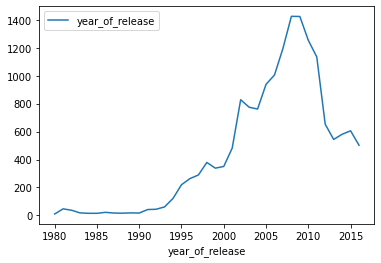

In [17]:
games.groupby('year_of_release').agg({'year_of_release': 'count'}).plot()

Вывод: по графику можно сделать вывод, что длинный хвост из 80-х и 90-х годов неважен для анализа 2016 года и его можно не учитывать в анализе. 

3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы

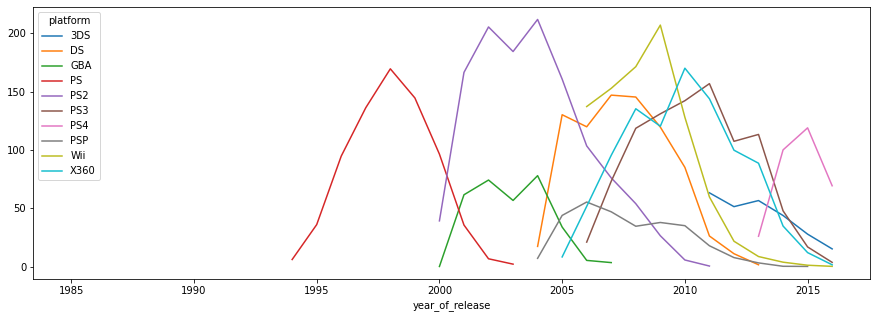

In [18]:
top_10 = games.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(10).index
games.query('platform in @top_10').pivot_table(index = 'year_of_release', columns = 'platform',
                                              values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 5));

In [19]:
#минимальные значимые продажи в миллионах 
min_sales = 10
#суммарные продажи в год выше порога 
report = games.groupby(['platform', 'year_of_release']).agg({'total_sales': 'sum'}).query('total_sales > @min_sales')
# среднее число лет выше порога продаж, деленное на 2 (потому что половину жизни платформа падает)
report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() / 2

year_of_release    3.043478
dtype: float64

3.3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.


In [20]:
# в результате исследования предыдущих вопросов делаем вывод, что актуальные период = 3 года. Отфильтруем данные. 
new_games = games.query('year_of_release >= 2014')
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,8.2,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

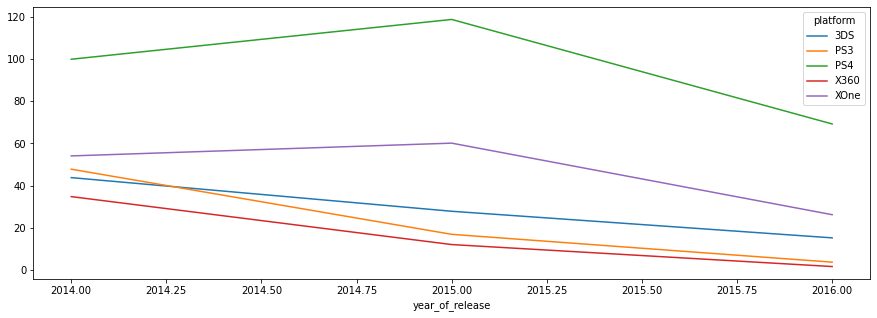

In [21]:
# выберем 5 лидирующие платформы в актуальном периоде 
top_5 = new_games.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by = 'total_sales').tail(5).index
new_games.query('platform in @top_5').pivot_table(index = 'year_of_release', columns = 'platform',
                                              values = 'total_sales', aggfunc = 'sum').plot(figsize = (15, 5));

Вывод: можно сделать вывод, что самое перспективной платформой является PS4. 

3.5 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

(0.0, 10.0)

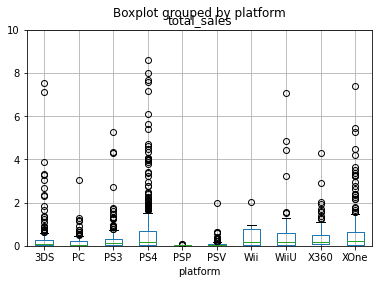

In [22]:
new_games.boxplot('total_sales', by = 'platform')
plt.ylim(0, 10)
                                            

(0.0, 1.6)

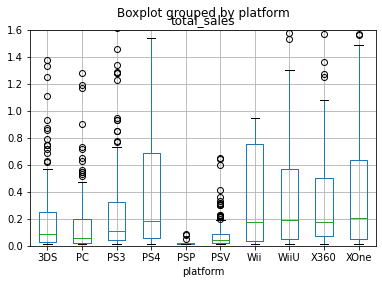

In [23]:
new_games.boxplot('total_sales', by = 'platform')
plt.ylim(0, 1.6)

Вывод: по графику можно заметить, что наиболее популярные платформы это PS4, XOne. Такое же распределение мы видели на графике.  

3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

Возьмем две наиболее популярные платформы PS4 и XOne, построим для них диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.  

0.4026614106810408
-0.04013158973738033


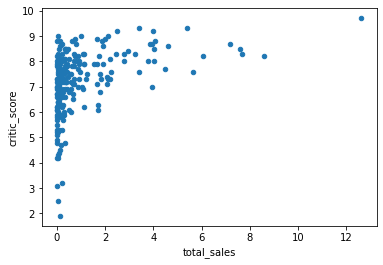

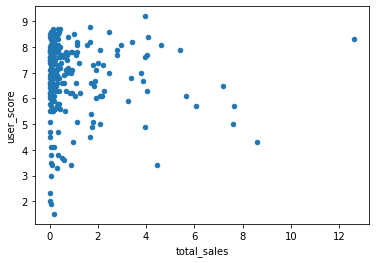

In [24]:
#возьмем популярную платформу PS4 и посмотрим как влияют на продажи отзывы пользователей и критиков
print(new_games.query('platform == "PS4"')['total_sales'].corr(new_games.query('platform == "PS4"')['critic_score']))
new_games.query('platform == "PS4"').plot(x = 'total_sales', y = 'critic_score', kind = 'scatter');
print(new_games.query('platform == "PS4"')['total_sales'].corr(new_games.query('platform == "PS4"')['user_score']))
new_games.query('platform == "PS4"').plot(x = 'total_sales', y = 'user_score', kind = 'scatter');

0.42867694370333204
-0.07038393161528515


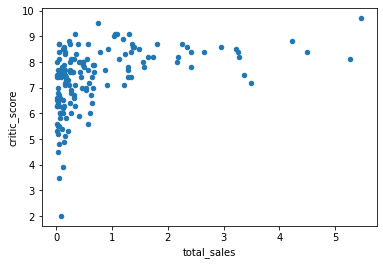

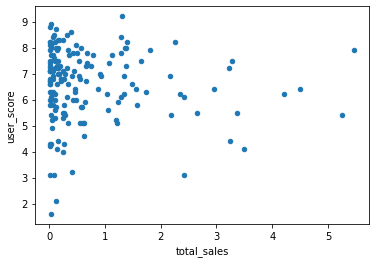

In [25]:
#платформа XOne 
print(new_games.query('platform == "XOne"')['total_sales'].corr(new_games.query('platform == "XOne"')['critic_score']))
new_games.query('platform == "XOne"').plot(x = 'total_sales', y = 'critic_score', kind = 'scatter');
print(new_games.query('platform == "XOne"')['total_sales'].corr(new_games.query('platform == "XOne"')['user_score']))
new_games.query('platform == "XOne"').plot(x = 'total_sales', y = 'user_score', kind = 'scatter');

Вывод: Исходя из графиков и значений коэффициентов корреляции можно сделать вывод, что по обеим платформам (PS4 и XOne) - корреляция между продажами и отзывами критиков - средняя положительная. То есть можно заметить рост продаж у игр с высокими оценками критиков. 

Корреляция между отзывами пользователей и продажами не выявлена. 

3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [26]:
new_games.groupby('genre').agg({'name': 'count', 'total_sales': 'median'}).sort_values(by='name', ascending=False)

,name,total_sales
genre,,
Action,619,0.090
Role-Playing,221,0.110
Adventure,185,0.030
Sports,161,0.180
Shooter,128,0.515
Misc,113,0.090
Racing,69,0.090
Fighting,60,0.125
Simulation,44,0.100


Вывод: Жанры с высокими продажами - Shooter, Sports, Fighting, Platform, Role-Playing.  Неожидано низкое значение медианы, хотя игр в таком жанре большое кол-во - Action и Adventure. 

### Портрет пользователя каждого региона

In [27]:
# таблица с продажами игр на каждой платформе в каждом регионе
new_games.groupby('platform').agg({'name': 'count', 
                                   'na_sales': 'sum', 
                                   'eu_sales': 'sum', 
                                   'jp_sales': 'sum', 
                                   'total_sales': 'sum'}).sort_values(by='name', ascending=False)

,name,na_sales,eu_sales,jp_sales,total_sales
platform,,,,,
PS4,376,98.61,130.04,15.02,288.15
PSV,295,2.52,3.53,14.54,22.40
XOne,228,81.27,46.25,0.32,140.36
PS3,219,22.05,25.54,11.22,68.18
3DS,212,22.64,16.12,44.24,86.68
PC,151,7.23,17.97,0.00,27.05
X360,111,28.30,15.49,0.08,48.22
WiiU,73,19.36,13.15,7.31,42.98
PSP,13,0.00,0.00,0.36,0.36


Вывод: 
1. ТОП5 платформ Северной Америки - PS4, XOne, 3DS, PS3, X360.
2. ТОП5 платформ Европы - PS4, XOne, PS3, PC, 3DS. 
3. ТОП5 платформ Японии - 3DS, PS4, PSV, PS3, WiiU. 

Ниже для каждого региона посчитаны доли продаж на самых популярных платформах.

In [28]:
#строим сводную таблицу методом .pivot_table(), с группировкой по платформам в рамках региона Северная Америка,
#применяем функцию aggfunc() к значениям: сумма продаж выпускаемых игр в одном регионе 
report_games_na = new_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc ={'sum'})
report_games_na.sort_values(by = 'sum', ascending = False).head(5)
 
#срез для пяти топ-платформ в Северной Америке
top_na_sales = report_games_na.query('platform in ["X360", "PS4","PS3","XOne", "3DS"]')
 
#доля продаж для каждой из топ-пяти платформ в регионе Северная Америка
top_na_sales['top_sum'] = top_na_sales['sum'].sum()#общая сумма продаж пяти самых популярных платформ в Северной Америке
top_na_sales['%'] = (top_na_sales['sum']/top_na_sales['top_sum'] * 100)
top_na_sales['100%'] = top_na_sales['%'].sum()
top_na_sales.sort_values(by = '%', ascending = False)

,sum,top_sum,%,100%
platform,,,,
PS4,98.61,252.87,38.996322,100.0
XOne,81.27,252.87,32.139044,100.0
X360,28.30,252.87,11.191521,100.0
3DS,22.64,252.87,8.953217,100.0
PS3,22.05,252.87,8.719896,100.0


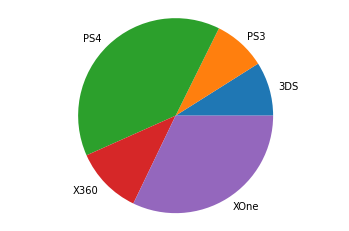

In [29]:
labels = top_na_sales.index
sizes = top_na_sales['sum']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)
ax1.axis('equal')  
plt.show()

In [30]:
# для Европы 
report_games_eu = new_games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc ={'sum'})
report_games_eu.sort_values(by = 'sum', ascending = False).head(5)
top_eu_sales = report_games_eu.query('platform in ["XOne", "PS4","PS3","PC", "3DS"]') 
top_eu_sales['top_sum'] = top_eu_sales['sum'].sum()
top_eu_sales['%'] = (top_eu_sales['sum']/top_eu_sales['top_sum'] * 100)
top_eu_sales['100%'] = top_eu_sales['%'].sum()
top_eu_sales.sort_values(by = '%', ascending = False)

,sum,top_sum,%,100%
platform,,,,
PS4,130.04,235.92,55.120380,100.0
XOne,46.25,235.92,19.604103,100.0
PS3,25.54,235.92,10.825704,100.0
PC,17.97,235.92,7.616989,100.0
3DS,16.12,235.92,6.832825,100.0


In [31]:
# для Японии 
report_games_jp = new_games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc ={'sum'})
report_games_jp.sort_values(by = 'sum', ascending = False).head(5)
top_jp_sales = report_games_jp.query('platform in ["PSV", "PS4","PS3","WiiU", "3DS"]') 
top_jp_sales['top_sum'] = top_jp_sales['sum'].sum()
top_jp_sales['%'] = (top_jp_sales['sum']/top_jp_sales['top_sum'] * 100)
top_jp_sales['100%'] = top_jp_sales['%'].sum()
top_jp_sales.sort_values(by = '%', ascending = False)

,sum,top_sum,%,100%
platform,,,,
3DS,44.24,92.33,47.915087,100.0
PS4,15.02,92.33,16.267735,100.0
PSV,14.54,92.33,15.747861,100.0
PS3,11.22,92.33,12.152063,100.0
WiiU,7.31,92.33,7.917253,100.0


In [32]:
# таблица с самыми популярными жанрами в каждом регионе
new_games.groupby('genre').agg({'name': 'count', 'na_sales': 'sum', 'eu_sales': 'sum', 'jp_sales': 'sum', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

,name,na_sales,eu_sales,jp_sales,total_sales
genre,,,,,
Action,619,72.53,74.68,29.58,199.36
Role-Playing,221,33.47,28.17,31.16,101.44
Adventure,185,5.64,6.49,3.60,17.55
Sports,161,46.13,45.73,3.26,109.48
Shooter,128,79.02,65.52,4.87,170.94
Misc,113,15.05,12.86,5.61,37.55
Racing,69,8.74,14.13,1.76,27.52
Fighting,60,12.43,6.69,6.37,28.22
Simulation,44,2.63,7.30,2.31,13.13


Выводы: 
1. ТОП5 популярных жанров в Северной Америке - Shooter, Action, Sports, Playing, Misc. 
2. ТОП5 популярных жанров в Европе - Action, Shooter, Sports, Role-Playing, Racing.
3. ТОП5 популярных жанров в Японии - Role-Playing, Action, Fighting, Misc, Shooter. 

### Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются. 

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [33]:
alpha = .05
results = st.ttest_ind(new_games.query('platform == "XOne"')['user_score'].dropna(), 
                       new_games.query('platform == "PC"')['user_score'].dropna()
                      )
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC различаются. 

#### Гипотеза 2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

In [34]:
alpha = .05
results = st.ttest_ind(new_games.query('genre == "Action"')['user_score'].dropna(), 
                       new_games.query('genre == "Sports"')['user_score'].dropna()
                      )
print('p-значение: ', results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.871146400695882e-19
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные.

### Общие выводы 

Анализ был выполнен для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

**Входные данные** —  исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

**Результаты исследования** позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** :
1. Провести исследовательский анализ данных.
2. Составить портрет пользователя каждого региона.
3. Проверить 2 гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

Основное исследование прошло в 5 этапов:
##### Изучение общей информации о данных.
На данном этапе мы изучили общую информацию о данных в таблицах и увидели, с чем предстоит иметь дело. В каждой строке таблицы представлены данные об определенной игре. Общая информация (название, жанр и тд), а также информация о продажах, оценки(пользователей, критиков) и рейтинг ESRB .

##### Предобработка данных. 
На втором этапе мы подготовили данные ддля дальнейшего анализа. А именно:
1. Название столбцов приведены к праильному виду.
2. В столбцах Year_of_Release и Rating заполнены пропущенные значения.
3. Изменены типы данных в столбцах user_score и year_of_release.

##### Анализ данных 
На третьем этапе мы проанализировали данные, краткие итоги представлены ниже.
1. Сделан вывод, что длинный хвост из 80-х и 90-х годов неважен для анализа 2016 года и его можно не учитывать в анализе.
2. Определен актуальный период для анализа - 3 года.
3. Определены ТОП3 потенциально прибыльных платформы - PS4, XOne и 3DS. Самой перспективной платформой является PS4.
4. Построенм график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 
5. Корреляция между продажами и отзывами критиков - средняя положительная. То есть можно заметить рост продаж у игр с высокими оценками критиков. Корреляция между отзывами пользователей и продажами не выявлена.
6. Определены жанры с высокими продажами - Shooter, Sports, Fighting, Role-Playing. Неожидано низкое значение медианы, хотя игр в таком жанре большое кол-во - Action и Adventure.


#### Составление портрета пользователя каждого региона
1. ТОП5 платформ Северной Америки - PS4, XOne, 3DS, PS3, X360. ТОП5 популярных жанров - Shooter, Action, Sports, Playing, Misc.
2. ТОП5 платформ Европы - PS4, XOne, PS3, PC, 3DS. ТОП5 популярных жанров - Action, Shooter, Sports, Role-Playing, Racing.
3. ТОП5 платформ Японии - 3DS, PS4, PSV, PS3, WiiU. ТОП5 популярных жанров - Role-Playing, Action, Fighting, Misc, Shooter.

##### Проверка гипотез 
На четвертом этапе с помощью тестов мы проверили 2 гипотезы и сделали следующие выводы: 
1. Средние пользовательские рейтинги платформ Xbox One и PC различаются. 
2. Средние пользовательские рейтинги жанров Action и Sports разные.

##### Итоговый вывод
Исходя из результатов проведенного анализа интернет-магазину «Стримчик» на 2017 год можно рекомендовать следующее: 
1. Самая популярная платформа, на которую стоит делать ставки - PS4. 
2. Наиболее прибыльные и популярные жанры в Северной Америке и Еворпе - Shooter и Sports. В Японии - Role-Playing и Fighting. 